meta machine_learning baseline:

1.针对二分类和多分类(后续加入回归)

2.包含逻辑回归，决策树，随机森林，xgboost模型

3.可根据需求自动调整超参数

待改进：
1.加入特征工程
3.加入回归分析
4.加入神经网络方法(tensorflow框架)

以肿瘤病人预测为例

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 数据处理

In [6]:
data = pd.read_table("./austria.crc.crc_control.input.trans.profile.new2",header=None)
data1 = data.T
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,Age,BMI,cohort,ID,Lachnospiraceae_bacterium_4_1_37FAA,Porphyromonas_uenonis,Prevotella_bivia,Escherichia_unclassified,Rothia_unclassified,Actinomyces_naeslundii,...,Adlercreutzia_equolifaciens,Bacteroides_pectinophilus,Streptococcus_gordonii,Eubacterium_ramulus,Prevotella_intermedia,Streptococcus_intermedius,Fusobacterium_gonidiaformans,Klebsiella_sp_MS_92_3,Bacteroides_sp_2_1_16,Alistipes_sp_HGB5
1,46,23.15,controls,531414,0.00000,0.00000,0.00000,0.00485,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.09095,0.00000,0.00000,0.00000,0.00000,0,0.00000
2,68,22.2,controls,31333,0.00000,0.00000,0.00000,0.00368,0.00341,0.00000,...,0.00000,0.00000,0.00000,0.00043,0.00000,0.00000,0.00000,0.00000,0,0.00000
3,68,23.53,controls,532802,0.00000,0.00000,0.00000,0.05959,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.05034,0.00000,0.00000,0.00000,0.00000,0,0.00000
4,68,21.7,controls,31300,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.25715,19.33382,0.00000,0.33503,0.00000,0.00000,0.00000,0.00000,0,0.00000


In [7]:
x_df=data1.loc[1:,3:].drop(3,axis=1)

In [8]:
y_df=data1.loc[1:,2]

In [9]:
labelencoder=LabelEncoder()

In [10]:
y_hat=labelencoder.fit_transform(y_df)

In [11]:
x_df=pd.DataFrame(x_df,dtype=np.float)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_df,y_hat,test_size=0.2,random_state=4)

## 逻辑回归

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model= LogisticRegression()

In [15]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#y_prob = lr_model.predict_proba(X_test)[:,1]
y_prob = lr_model.predict_proba(X_test)

In [19]:
#y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred = y_prob.argmax(axis=1)

In [21]:
lr_model.score(X_test, y_pred)

1.0

In [24]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.40      0.50      0.44         8
          1       0.67      0.57      0.62        14

avg / total       0.57      0.55      0.55        22

0.5357142857142857
log_loss: 2.55466598132505


### 超参树调整

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model2= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] ,
              'penalty':['l1','l2']
                   }

In [49]:
from sklearn.model_selection import GridSearchCV
LR= GridSearchCV(lr_model2, tuned_parameters,cv=10)

In [50]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l1'}


In [52]:
y_prob = LR.predict_proba(X_test)
# y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred = y_prob.argmax(axis=1)
LR.score(X_test, y_pred)

1.0

In [25]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.40      0.50      0.44         8
          1       0.67      0.57      0.62        14

avg / total       0.57      0.55      0.55        22

0.5357142857142857
log_loss: 2.55466598132505


## 决策树

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_model = DecisionTreeClassifier()

In [27]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_prob = tree_model.predict_proba(X_test)
# y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred = y_prob.argmax(axis=1)
tree_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
metrics.roc_auc_score(y_test,y_pred)
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.80      0.86      0.83        14

avg / total       0.77      0.77      0.77        22

0.7410714285714286


### 超参数调整

In [30]:
tree_model2 = DecisionTreeClassifier()
tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(1,10,1) , 'max_depth': range(1,10,1)
                  }

In [31]:
TM = GridSearchCV(tree_model2, tuned_parameters,cv=10)

In [32]:
TM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print(TM.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3}


In [45]:
y_prob = TM.predict_proba(X_test)
# y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred = y_prob.argmax(axis=1)
TM.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         8
          1       1.00      0.71      0.83        14

avg / total       0.88      0.82      0.82        22

0.8571428571428572


## 随机森林

In [46]:
from sklearn.ensemble import RandomForestClassifier

/Users/shizhiluo/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
rr_model=RandomForestClassifier()

In [54]:
rr_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_prob = rr_model.predict_proba(X_test)  
# y_pred = np.where(y_prob > 0.5, 1, 0) 
y_pred = y_prob.argmax(axis=1)
rr_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.75      0.75      0.75         8
          1       0.86      0.86      0.86        14

avg / total       0.82      0.82      0.82        22

0.8035714285714285


### 超参数调整

In [63]:
RR = GridSearchCV(model_RR, tuned_parameters,cv=10)
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [65]:
RR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
y_prob = RR.predict_proba(X_test)
# y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred = y_prob.argmax(axis=1)
RR.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.60      0.75      0.67         8
          1       0.83      0.71      0.77        14

avg / total       0.75      0.73      0.73        22

0.7321428571428572


## XGBoost

In [ ]:
#from sklearn import preprocessing
#lbl = preprocessing.LabelEncoder()
#train_x['acc_id1'] = lbl.fit_transform(train_x['acc_id1'].astype(str))#将提示的包含错误数据类型这一列进行转换

In [27]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(objective='binary:logistic')  #二分类
# XGB_model=XGBClassifier(objective= 'multi:softprob') # 多分类

In [14]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
y_prob = XGB_model.predict_proba(X_test)
y_pred = y_prob.argmax(axis=1)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss:", metrics.log_loss(y_test, y_prob))  #评估多分类

             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.80      0.86      0.83        14

avg / total       0.77      0.77      0.77        22

0.7410714285714286


/Users/shizhiluo/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
print(model_XGB.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.0285297  0.         0.         0.         0.         0.00524615
 0.         0.         0.         0.         0.         0.
 0.01947274 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01237625
 0.00628219 0.         0.         0.         0.         0.
 0.         0.         0.         0.00274954 0.         0.
 0.         0.         0.         0.0084788  0.         0.
 0.00349184 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03759316
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

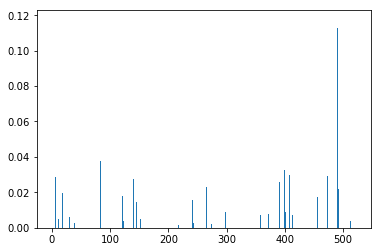

In [17]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

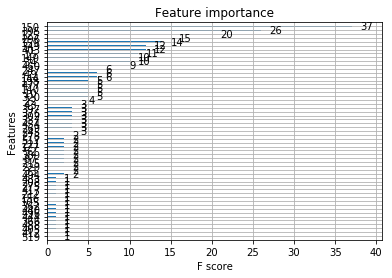

In [18]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(XGB_model)
pyplot.show()

In [29]:
help(plot_importance)

Help on function plot_importance in module xgboost.plotting:

plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)
    Plot importance based on fitted trees.
    
    Parameters
    ----------
    booster : Booster, XGBModel or dict
        Booster or XGBModel instance, or dict taken by Booster.get_fscore()
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    grid : bool, Turn the axes grids on or off.  Default is True (On).
    importance_type : str, default "weight"
        How the importance is calculated: either "weight", "gain", or "cover"
    
        * "weight" is the number of times a feature appears in a tree
        * "gain" is the average gain of splits which use the feature
        * "cover" is the average coverage of splits which use the featu

###  特征选择